Import all the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy, math
import pandas as pd
%matplotlib inline

Read in the housing dataset then split up the data into X and Y.

In [2]:
dataset_df = pd.read_csv('Housing.csv')

print("Full train dataset shape is {}".format(dataset_df.shape))

dataset_df = dataset_df.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], axis=1)

y_train = np.array(dataset_df['price'])
dataset_df = dataset_df.drop(['price'], axis=1)
X_train = np.array(dataset_df)

Full train dataset shape is (545, 13)


Check the dimensions of the variables and see how many training examples you have in your dataset.

In [3]:
print("The shape of x_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("Number of training exmaples (m):", len(X_train))

The shape of x_train is:  (545, 4)
The shape of y_train is:  (545,)
Number of training exmaples (m): 545


Visualize the data using a scatter plot.

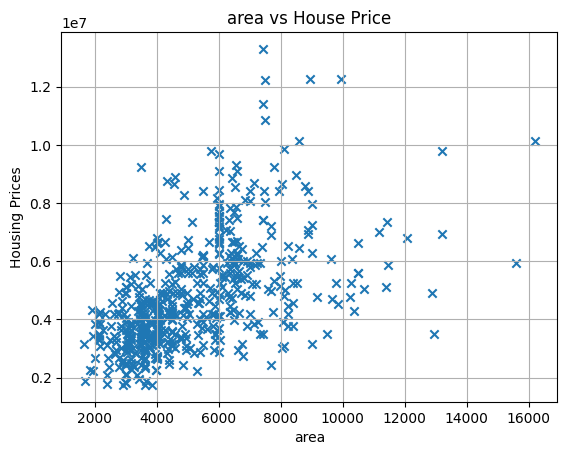

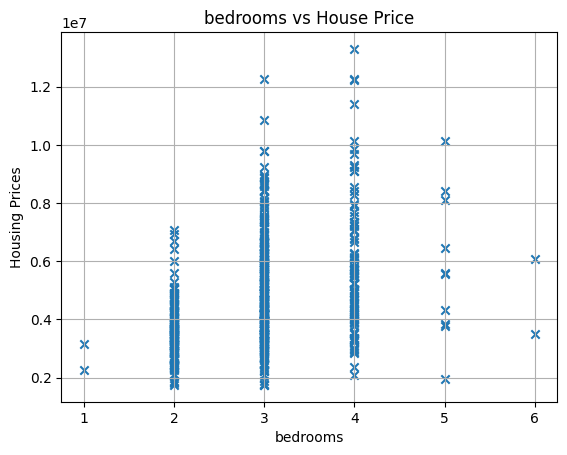

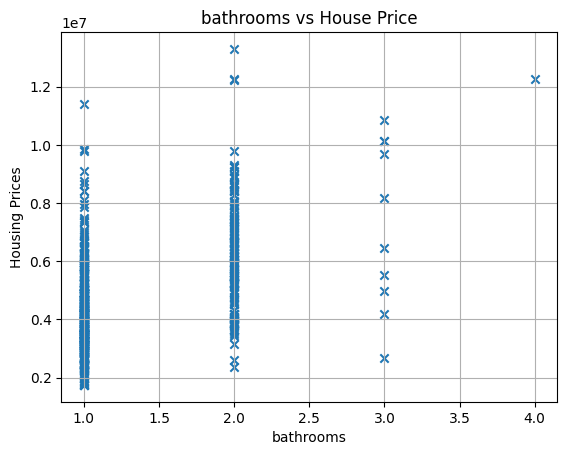

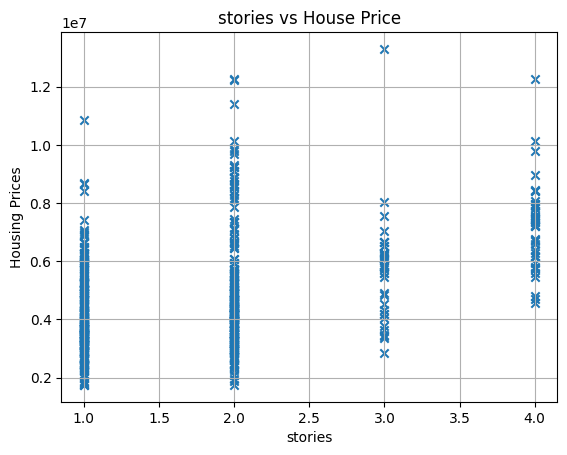

In [4]:

feature_names = dataset_df.columns

for i in range(X_train.shape[1]):
    plt.figure()
    plt.scatter(X_train[:, i], y_train, marker='x')
    plt.xlabel(feature_names[i])
    plt.ylabel('Housing Prices')
    plt.title(f'{feature_names[i]} vs House Price')
    plt.grid(True)
    plt.show()

In [5]:
def zscore_normalize_features(x):
    # find the mean of each column/feature
    mu     = np.mean(x, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(x, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (x - mu) / sigma      

    return (X_norm, mu, sigma)

In [6]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

# Scale down the housing prices to 'Tens of Thousands'
y_train = y_train / 10000

X_mu = [5.15054128e+03 2.96513761e+00 1.28623853e+00 1.80550459e+00], 
X_sigma = [2.16814915e+03 7.37386427e-01 5.02008423e-01 8.66696233e-01]
Peak to Peak range by column in Raw        X:[14550     5     3     3]
Peak to Peak range by column in Normalized X:[6.71079293 6.78070523 5.97599535 3.46142038]


C:\Users\James\AppData\Local\Temp\ipykernel_14276\897235477.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].set_ylabel("Housing Prices in $10,000"); ax[0].legend()


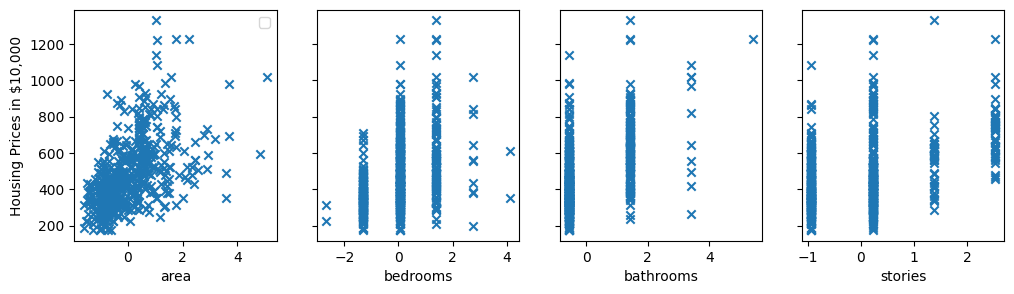

In [7]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, marker='x')
    ax[i].set_xlabel(feature_names[i])
ax[0].set_ylabel("Housing Prices in $10,000"); ax[0].legend()
plt.show()

Create the cost function for multi-variable linear regression.

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0

    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost

    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [9]:
initial_w = 2
initial_b = 1

cost = compute_cost(X_norm, y_train, initial_w, initial_b)

print(type(cost))
print(f"Cost at initial w: {cost}")

<class 'numpy.ndarray'>
Cost at initial w: [130394.66462665 130458.01557135 130401.56096374 130437.75176127]


In [10]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        dj_db_i = (f_wb - y[i])
        dj_dw_i = ((f_wb - y[i]) * x[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [11]:
# Check the implementation of compute_gradient with parameters w and b.

initial_w = 0
initial_b = 0

tmp_dj_dw, temp_dj_db = compute_gradient(X_norm, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, temp_dj_db)

Gradient at initial w, b (zeros): [-100.16304759  -68.48757523  -96.71487904  -78.61948028] [-476.67292477 -476.67292477 -476.67292477 -476.67292477]


In [12]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # num training examples
    m = len(x)

    # Array to store cost J and w's after each iteration
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        # Calculate gradient and update parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha, and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every interval
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {J_history[-1]}   ")

    return w, b, J_history, w_history

In [13]:
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0

iterations = 3000
alpha = 0.01

w_norm,b_norm,_,_ = gradient_descent(X_norm, y_train, initial_w, initial_b,
                           compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 128508.36063541358   
Iteration  300: Cost 8392.08034701693   
Iteration  600: Cost 8109.748760150249   
Iteration  900: Cost 8108.794163423055   
Iteration 1200: Cost 8108.783622585528   
Iteration 1500: Cost 8108.78334724903   
Iteration 1800: Cost 8108.783338994561   
Iteration 2100: Cost 8108.783338744059   
Iteration 2400: Cost 8108.783338736451   
Iteration 2700: Cost 8108.783338736217   
w,b found by gradient descent: [82.3949644  14.62204127 60.25007049 46.07313868] 476.6729247706038


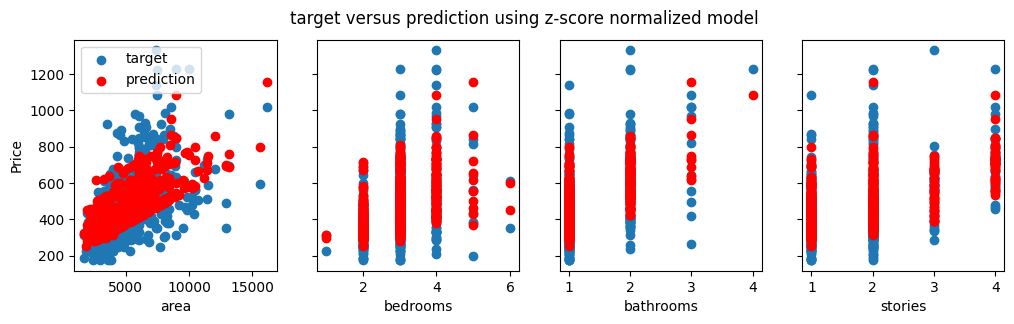

In [15]:
# predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(feature_names[i])
    ax[i].scatter(X_train[:,i],yp,color='red', label = 'prediction')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()